# **How common is diabetes?**
<center><img src = "https://www.cifc.org/sites/g/files/vyhlif9361/files/media/patient-health-resources/image/1711/type-two-diabetes-facts-and-stats-you-need-to-know-1440x810.jpg"/></center>


Diabetes is one of the most common chronic diseases in the United States. It is reported to be the eighth leading cause of death in the United States, affecting over 38.4 million individuals annually. An individual diagnosed with diabetes can be prone to multiple other diseases. Diabetes is associated with severe complications such as heart disease, vision loss, limb amputation, and kidney disease, making prevention and effective management crucial.

In the United States, the disease also contributes singificantly to household expenditure. The average out-of-pocket cost for a 30-day supply was $58 per insulin fill in 2019. From both an economic and a healthcare perspective, the prevention of diabetes assumes paramount importance.

Diabetes prediction models not only help with providing insight into risk factors for individuals but they can also assist healthcare and public systems in predicting the demand for required drugs,therapies and patient care.

In this project, we will utilize the 2015 telephone survey data from the CDC to examine diabetes patterns in the United States and construct predictive models.


## **Data Source**

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used.

Kaggle Source:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

## **Preparing our data**

Let's begin by importing our data using the pandas module.

In [ ]:
import pandas as pd
db=pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

The following dataset was obtained from Kaggle. The data was derived from the Centers for Disease Control and Prevention (CDC) via their Behavioral Risk Factor Surveillance System (BRFSS) for the year 2015.


The variable are mostly binary due to closed ended questions resulting to yes or no responses, however, there are some quantitative and categorical variables also included. The variables and their descriptions can be seen below:


In [ ]:
db.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0




*   Our data contains 22 columns and 70,692 data points.

In [ ]:
db.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000




*   There are 22 columns overall. Diabetes_binary is our predictive variable which takes a value of 1 if an individual is pre-diabetic or diabetic and 0 otherwise.

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

Our dataset is pre-cleaned hence there are no missing/null values.

In [ ]:
db.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

## **Exploratory Data Analysis: Which factors impact diabetes the most?**

Given that our data is already pre-cleaned we can move on to analyzing how our variables correlate with the diabetes indicator.

We can split our data into two type of indicators: Demographic and non-demographic. Using python's seaborn tool, we will look at how the proportion of diabetes is distributed across various demographic categories.

The demographic indicators in the data:

*   Sex
*   Age
*   Income
*   AnyHealthcare
*   Education

In [ ]:
by_age = db.groupby(['Age'])['Diabetes_binary'].mean().reset_index()

by_Income = db.groupby(['Income'])['Diabetes_binary'].mean().reset_index()

by_Educ = db.groupby(['Education'])['Diabetes_binary'].mean().reset_index()

Trend by Age, Income and Education:


*  The bar graphs below plot the frequency of diabetes in each demographic category, which will help us visualize how prevalence differs within groups.



<ipython-input-12-23e3f8f6b29d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_age, x='Age', y='Diabetes_binary', palette= 'Blues',ax = ax1)
<ipython-input-12-23e3f8f6b29d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_Income, x='Income', y='Diabetes_binary', palette= 'Blues',ax = ax2)
<ipython-input-12-23e3f8f6b29d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_Educ, x='Education', y='Diabetes_binary', palette= 'Blues',ax = ax3)


Text(0, 0.5, 'Frequency')

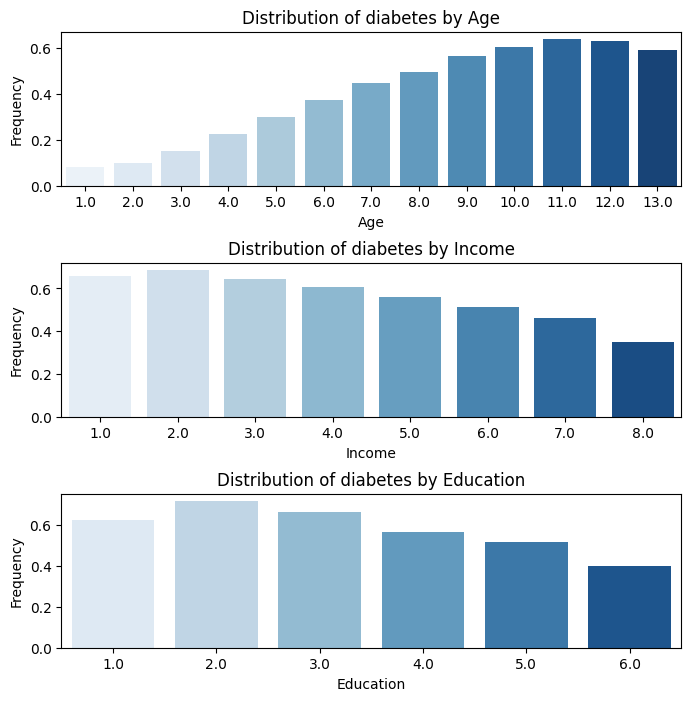

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=by_age, x='Age', y='Diabetes_binary', palette= 'Blues',ax = ax1)
ax1.set_title('Distribution of diabetes by Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

sns.barplot(data=by_Income, x='Income', y='Diabetes_binary', palette= 'Blues',ax = ax2)
ax2.set_title('Distribution of diabetes by Income')
ax2.set_xlabel('Income')
ax2.set_ylabel('Frequency')

sns.barplot(data=by_Educ, x='Education', y='Diabetes_binary', palette= 'Blues',ax = ax3)
ax3.set_title('Distribution of diabetes by Education')
ax3.set_xlabel('Education')
ax3.set_ylabel('Frequency')


*  As expected, we see an upward trend in diabetes with age. Older participants
are more likely to have diabetes. Individuals in age brackets 9.0 and beyond seem more likely to be at risk of diabetes The 9.0 group here accounts for participants in the age bracket of 60-64, groups 9.0 and above indicates for individuals aged 60 and above.

*   On the other hand, we see a reverse trend with income. Participants from lower income groups are more prone to diabetes. This may be due to lack of accessibility to healthy eating options or good healthcare.

*   The trend with education is mixed. We see a spike around groups 2.0 and 3.0.Groups 2 and 3 contain groups that have recieved basic schooling, either only elementary or a medium level of schooling. These groups are more likely to have diabetes in contrast to groups that are more educated.



Text(0.5, 1.0, 'Diabetes distribution by healthcare status')

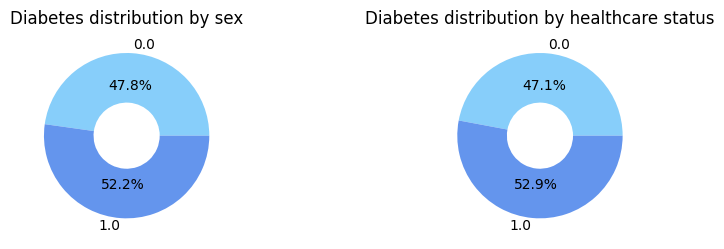

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
fig.subplots_adjust(hspace=1, wspace= 1)

by_sex = db.groupby(['Sex'])['Diabetes_binary'].mean().reset_index()
by_sex
colors = ['lightskyblue','cornflowerblue']

labels = by_sex['Sex']
values = by_sex['Diabetes_binary']
ax1.pie(values,labels = labels,autopct = '%1.1f%%',wedgeprops=dict(width=0.6),colors = colors)
ax1.set_title('Diabetes distribution by sex')

by_healthcare = db.groupby(['AnyHealthcare'])['Diabetes_binary'].mean().reset_index()
colors = ['lightskyblue','cornflowerblue']
labels = by_healthcare['AnyHealthcare']
values = by_healthcare['Diabetes_binary']
ax2.pie(values,labels = labels,autopct = '%1.1f%%',wedgeprops=dict(width=0.6),colors = colors)
ax2.set_title('Diabetes distribution by healthcare status')

*   There seems to be no significant variation in diabetes across Sex. The split for sex and diabetes is almost 50-50. Hence, it may be better to drop this indicator from our dataset.
*   Similarly, Healthcare status is also not a strong indicator of diabetes. There is almost equal prevalance of diabetes amongst both groups, participants that have healthcare and participants that do not have healthcare.

How does diabetes correlate with healthcare indicators?

<ipython-input-14-5ab0ddf71164>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_binary', y='BMI', showfliers = False, data=db, palette='Blues')


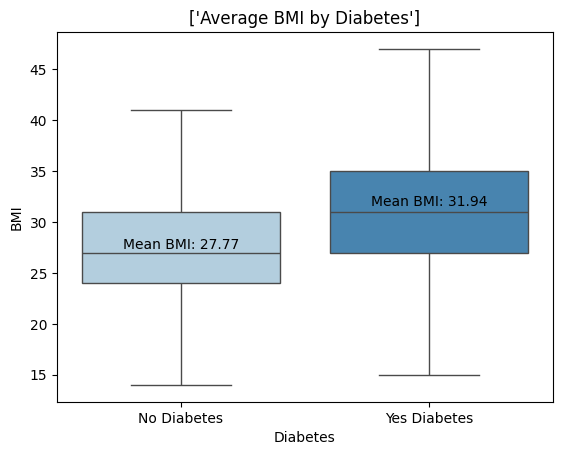

In [ ]:
average_bmi = db.groupby('Diabetes_binary')['BMI'].mean().reset_index()
fig, ax = plt.subplots()
BMI_Bar_Colors = ['green', 'red']

sns.boxplot(x='Diabetes_binary', y='BMI', showfliers = False, data=db, palette='Blues')
ax.set_ylabel('BMI')
ax.set_xlabel('Diabetes')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Diabetes', 'Yes Diabetes'])
ax.set_title(['Average BMI by Diabetes'])

no_diabetes_midpoint = average_bmi.loc[average_bmi['Diabetes_binary'] == 0, 'BMI'].values[0]
yes_diabetes_midpoint = average_bmi.loc[average_bmi['Diabetes_binary'] == 1, 'BMI'].values[0]

ax.text(0, no_diabetes_midpoint, f'Mean BMI: {no_diabetes_midpoint:.2f}', ha='center', va='center', fontsize=10, color='black')
ax.text(1, yes_diabetes_midpoint, f'Mean BMI: {yes_diabetes_midpoint:.2f}', ha='center', va='center', fontsize=10, color='black')

plt.show()


*   On average, individuals with diabetes seem to have higher BMI (31.94) compared to individuals without diabetes (27.77). Suggesting that healthcare choices also make a difference in causing diabetes.


# **Correlation Plot: How do our independent variables correlate with the diabetes indicator?**

Given that we have 21 independent variables to pick from for a prediction model, it might be more useful to visualize the correlation to understand which variables help explain our dependent variable the best. Simultaneously, we can also drop variables that are poorly correlated or inter-correlated in order to avoid bias.

In [ ]:
correlation= db.corr()
print("Correlation",correlation)

Correlation                       Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.381516  0.289213   0.115382   
HighBP                       0.381516  1.000000  0.316515   0.103283   
HighChol                     0.289213  0.316515  1.000000   0.085981   
CholCheck                    0.115382  0.103283  0.085981   1.000000   
BMI                          0.293373  0.241019  0.131309   0.045648   
Smoker                       0.085999  0.087438  0.093398  -0.004331   
Stroke                       0.125427  0.129060  0.099786   0.022529   
HeartDiseaseorAttack         0.211523  0.210750  0.181187   0.043497   
PhysActivity                -0.158666 -0.136102 -0.090453  -0.008249   
Fruits                      -0.054077 -0.040852 -0.047384   0.017384   
Veggies                     -0.079293 -0.066624 -0.042836   0.000349   
HvyAlcoholConsump           -0.094853 -0.027030 -0.025443  -0.027146   
AnyHealthcare                0.023191  0.035764  0.0

<Axes: >

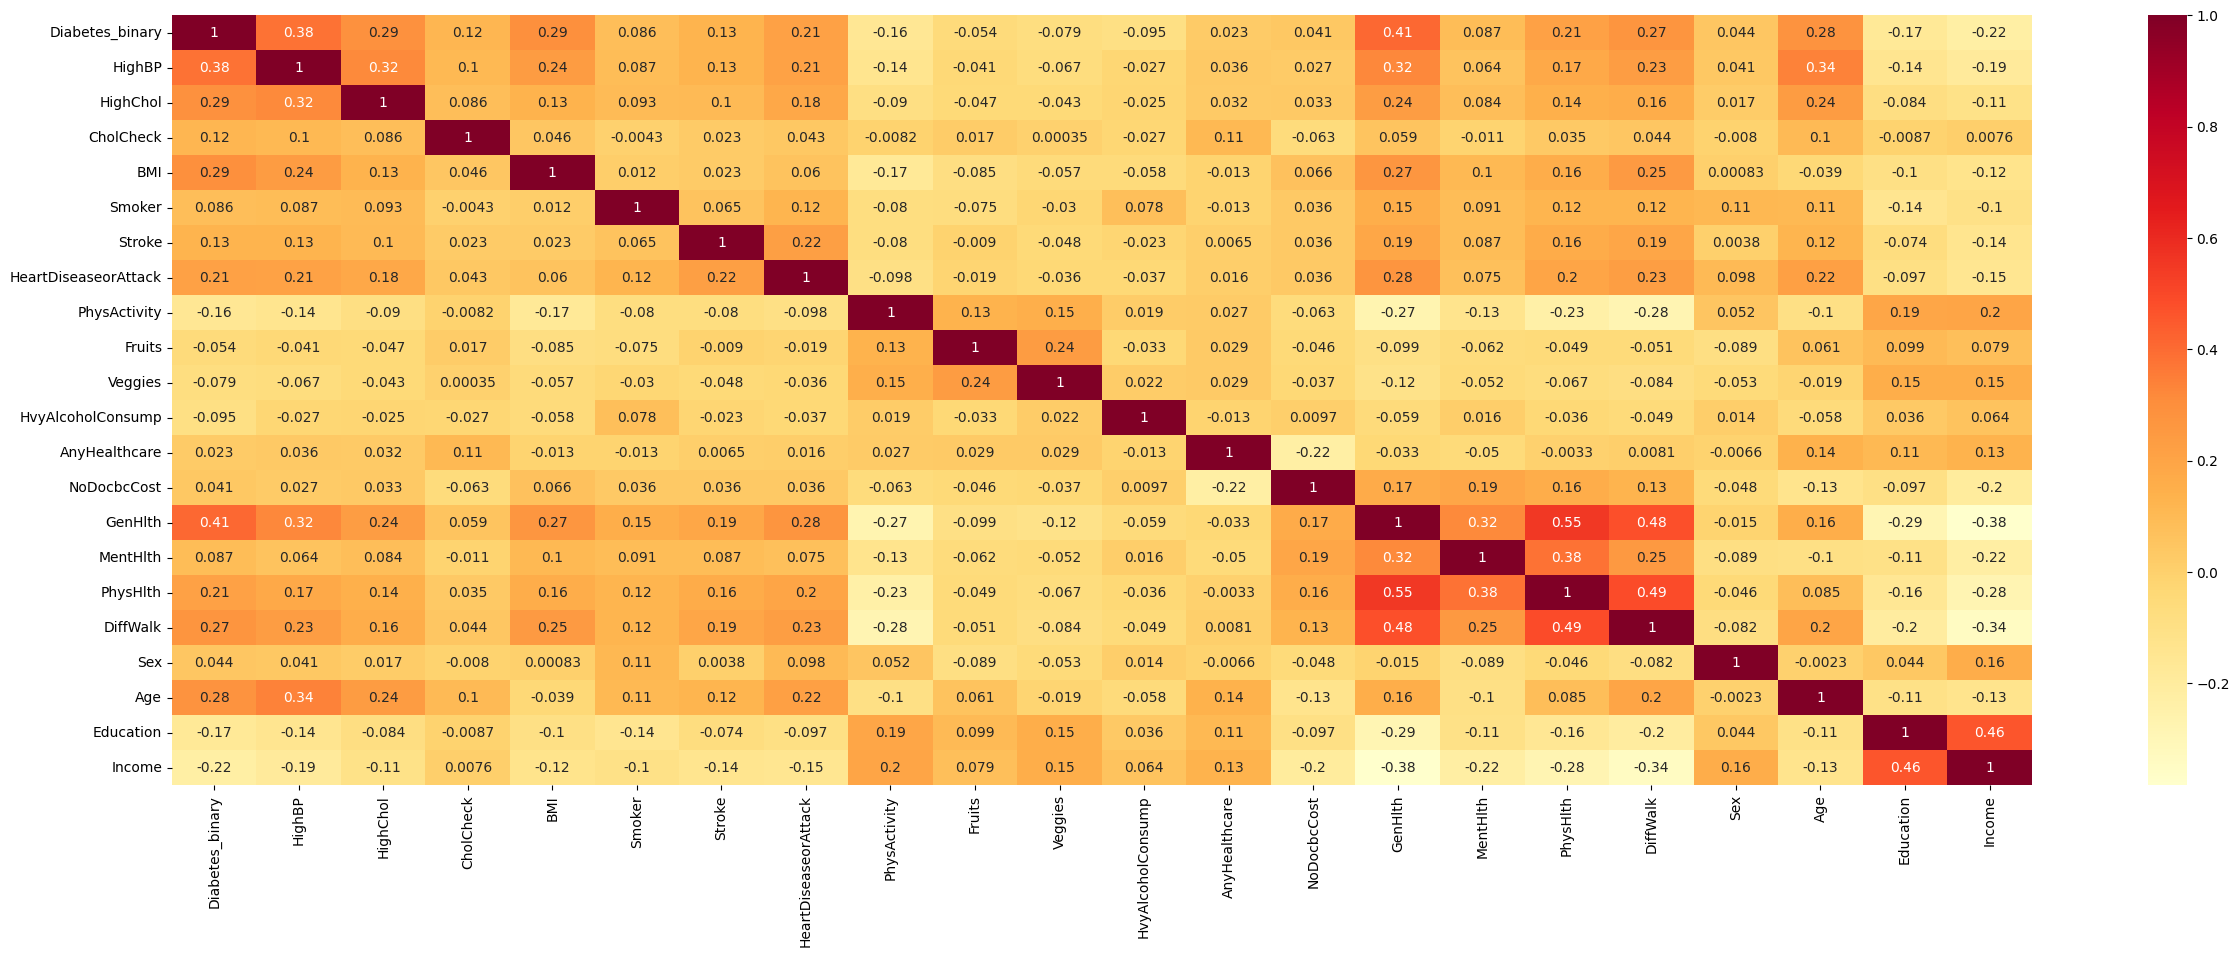

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(correlation,annot=True,cmap='YlOrRd')
#variables to drop: sex, AnyHealthcare, PhysHlth, DiffWalk, Fruits, Veggies, Education

# **Comparing models: Linear Regression vs KNN Model vs Logistic Regression**

### Removing highly correlated/poorly correlated indicators to improve model performance:



*   Multicollinearity occurs when two indicators are highly correlated. It reduces the statistical significance of our indicators and consquently makes our model less reliable.
*   In order to avoid **multicollinearity**, we need to remove indicators that are highly correlated. As seen above, the general health indicator is highly correlated with the mental health and physical health indicator. The indicators have a correlation of almost 0.5. We will also remove education as it is highly correlated with income.


Additionally, we will drop the following indicators that have a poor correlation with our dependent variable (correlation < 0.1):

'CholCheck','Stroke','Fruits','Sex','Veggies',
'AnyHealthcare', 'NoDocbcCost'and'DiffWalk'.

This also helps ensure that we are utilizing features that are redundant in our model.

## Linear Regression:
Using the **Ordinary Least Squares** model, we have created the following linear regression. Since, a majority of our indicators are categorical, we have used C() for the co-efficients of our categorical indicator.

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

db_2 =db.drop(['CholCheck','Stroke','Fruits','Sex','Veggies',
'AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','DiffWalk','Education'],axis=1)

['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'HvyAlcoholConsump',
 'GenHlth',
 'Age',
 'Income']

lin_model = ols('Diabetes_binary~ C(HighChol) + C(HighBP) + BMI + C(Smoker) + C(HeartDiseaseorAttack) +  C(PhysActivity) + C(HvyAlcoholConsump) + C(GenHlth) + C(Age) + C(Income)', data=db_2).fit()

print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Diabetes_binary   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        19:41:41   Log-Likelihood:                -38229.
No. Observations:               70692   AIC:                         7.652e+04
Df Residuals:                   70661   BIC:                         7.680e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

As seen above, the model is not a great predictor of diabetes. The R-squared is low at 0.309. The model is also not very coherent in terms of interpretation. For example, a one unit increase in BMI leads to an increase in diabetes by 0.0116 units. However, our dependent variable is a binary variable so the correlation between the two indicators is not straightforward.  

### k-Nearest Neighbours




Moving on to the next model, we can utilize the K nearest neighbours algorithm to see whether this proves a better fit for diabetes prediction.
K Nearest Neighbours is an algorithm that uses closeness between points to predict the classification of an individual data point.

We will use a confusion matrix, accuracy score and classification report to evaluate the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

cols_drop = ['CholCheck','Stroke','Fruits','Sex','Veggies',
                   'AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','DiffWalk','Education']
db_test = db.drop(cols_drop, axis=1)
X_knn = db_test.drop(['Diabetes_binary'], axis=1)
y_knn = db_test['Diabetes_binary']


X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, random_state=100)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.643483591097699

Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.81      0.69     10533
         1.0       0.72      0.47      0.57     10675

    accuracy                           0.64     21208
   macro avg       0.66      0.64      0.63     21208
weighted avg       0.66      0.64      0.63     21208



How well did the KNN model do?

The model was split into two sets. 30% for testing and 70% training. The results below have been achieved after running this model

<Axes: >

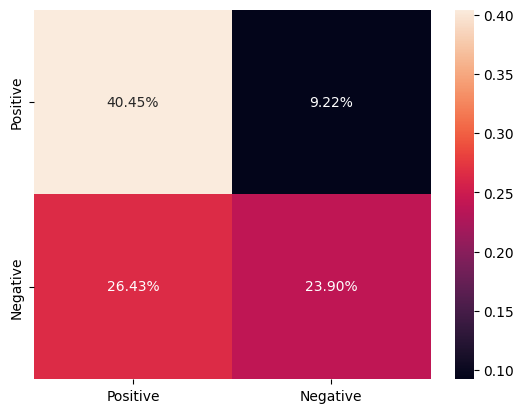

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knncfm = confusion_matrix(y_test,y_pred_knn)
labels = ['Positive','Negative']
sns.heatmap(knncfm/np.sum(knncfm), annot=True,
            fmt='.2%', cmap='rocket',xticklabels=labels, yticklabels=labels)

The KNN model has done moderately better than the linear regression model. Overall, the accuracy is around 64%. Our model does an average job in predicting the **true positives** i.e. predicting individuals who actually have diabetes. The true prediction rate is around 50%.

However, it does a poor job at predicting **true negatives**. The true negative prediction rate is only around 23.84%. This model may not be a good fit when predicting diabetes for individuals who do not have diabetes in reality.

## Logistic Regression

Given that our prediction variable is a binary indicator, logistic regression might be a better fit.


In [ ]:
from sklearn.linear_model import LogisticRegression

X=db.drop(['Diabetes_binary','CholCheck','Stroke','Fruits','Sex','Veggies',
'AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','DiffWalk','Education'],axis=1)
y=db['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.742078460958129

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     10533
         1.0       0.74      0.76      0.75     10675

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

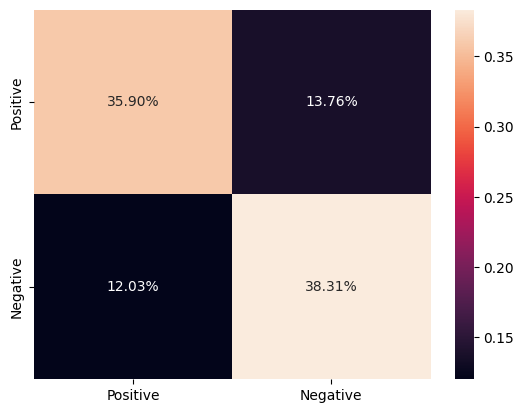

In [ ]:
logcfm=confusion_matrix(y_test, y_pred_log)
labels = ['Positive','Negative']
sns.heatmap(logcfm/np.sum(logcfm), annot=True,
            fmt='.2%', cmap='rocket',xticklabels=labels, yticklabels=labels)


Overall, the logistic regression model has a better true negative prediction rate (38.31%) than the KNN Model. Both models have similar accuracy and precision, but the logistic regression has a slightly better precision.



*   Precision for diabetes = 1.0 : KNN(0.72), Logistic Regression(0.74)
*   Precision for diabetes = 0.0 : KNN(0.60), Logistic Regression(0.75)



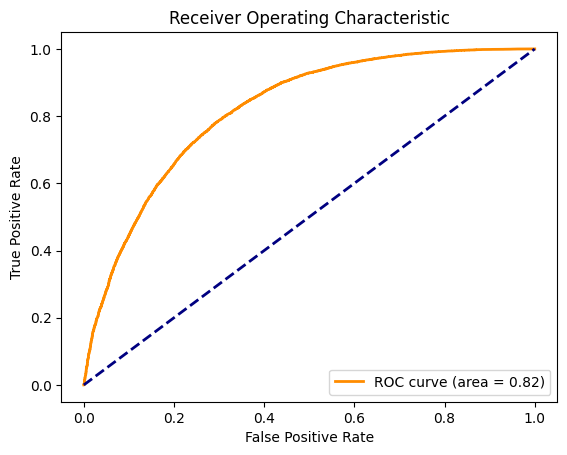

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

An AUC (Area Under the Curve) of 0.82 suggests that the model has a good ability to distinguish between the positive and negative diabetes cases.

### Model Analysis

**What are the leading indicators of diabetes?**

By ranking the absolute value of co-efficients we can compare variables by their prediction power. From the graph below, it appears that lifestyle choices play a substantial role in contributing to the onset of diabetes.

**HighBP**: is indicative of factors such as stress
**HeavyAlcoholconsumption and HighChol**: Poor lifestyle choices and lack of health discipline also contributes significantly to the incidence of diabetes.

Some factors may also be out of our control!

Characteristics such as age and income, are not neccessarily under individual control.  However, given that indicators such as high cholestrol and BP are determinants of diabetes risk, individuals can take early measures to prevent diabetes by doing regular checks.

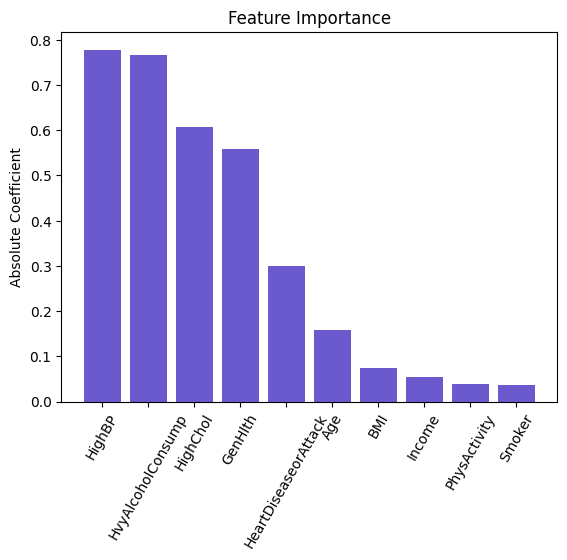

In [ ]:
import matplotlib.pyplot as plt


feature_importance = abs(logreg.coef_[0])
sorted_indices = feature_importance.argsort()[::-1]
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], color='slateblue')
plt.xticks(range(len(feature_importance)), X.columns[sorted_indices], rotation=60)
plt.title('Feature Importance')
plt.ylabel('Absolute Coefficient')
plt.show()

**How do our models compare overall?**




*   The Logistic regression model fares better in terms of coherence. KNN has a better diabetes prediction rate, however, with KNN it is harder to interpret which features correlate with diabetes the best.
*   Hence, it is a tradeoff between the model with better prediction rate vs the model with the better explanatory power. Additionally, the logistic regression model also has a better true negative prediction rate. With disease prediction, it is as important to predict true negatives correctly as it is to predict true positives to avoid risky false diagnoses.
*   A model with a lower true negative rate might lead to more instances where individuals without diabetes are incorrectly predicted to have diabetes. This can result in significant costs, both financially and in terms of health implications

